# L7: The irreducible mass of black holes

Assumpions:
- $\chi \in [0,1]$ uniformly distributed.
- $M_{BH}$ is normally distributed with $\mu = 1$ and $\sigma = 0.02$ (here $\mu$ is just a scale factor, all the masses in the following are measured in units of $\mu$).

The irreducible mass of the BH is definied as
$M_{irr} = M_{BH}  \sqrt{ \frac{1+\sqrt{1-\chi ^2}}{2} } \equiv M_{BH} \ f(\chi)  $

We have repeted measurments of $M_{BH}$ and $\chi$.

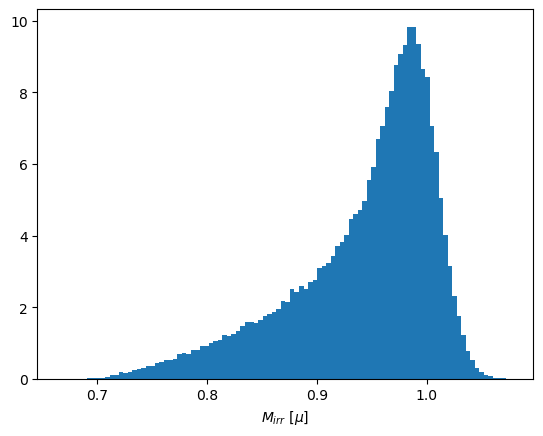

In [201]:
import matplotlib.pyplot as plt
import numpy as np

mu = 1
sigma = 0.02
N = 100000

M = np.random.normal(loc=mu, scale=sigma, size=N)
chi = np.random.uniform(0, 1, N)

M_irr = M * np.sqrt( ( 1 + np.sqrt(1-chi**2) )/2 )

plt.hist(M_irr, bins=100, density=True)
plt.xlabel('$M_{irr} \ [\mu]$')
plt.show()

Now, same data but with KDE

In [202]:
from sklearn.neighbors import KernelDensity

xgrid = np.linspace(min(M_irr), max(M_irr), 1000)

kde = KernelDensity(bandwidth=0.01, kernel='gaussian').fit(M_irr[:, np.newaxis])

log_pdf = kde.score_samples(xgrid[:, np.newaxis])

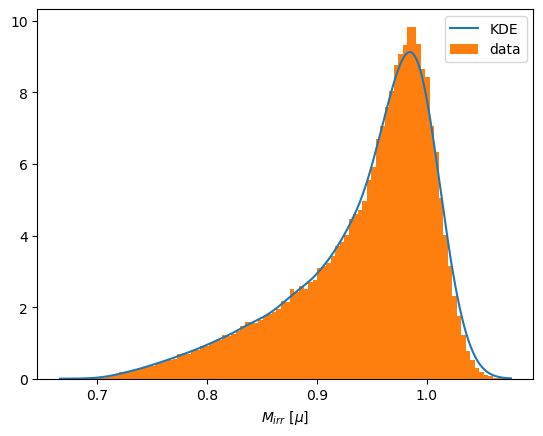

In [203]:
plt.plot(xgrid, np.exp(log_pdf), label='KDE')
plt.hist(M_irr, density=True, bins=100, label='data')
plt.legend()
plt.xlabel('$M_{irr} \ [\mu]$')
plt.show()

Now compute the KS test as a function of $\sigma$ between:
- $M_{irr}$ and $ f = \sqrt{ \frac{1+\sqrt{1-\chi ^2}}{2} } $
- $M_{irr}$ and $M_{BH}$

C:\Users\aleco\AppData\Local\Temp\ipykernel_18588\2160322603.py:18: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  KS_Mirr_f[i] = ks(M_irr, f).statistic


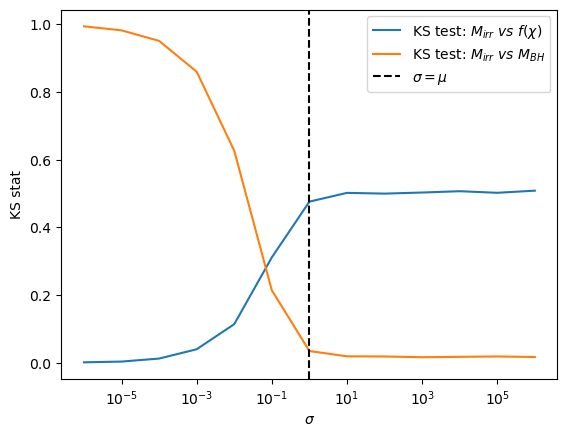

In [204]:
from scipy.stats import ks_2samp as ks 

mu = 1
N = 10000
sigma_arr = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6])

KS_Mirr_f = np.zeros(len(sigma_arr))
KS_Mirr_M = np.zeros(len(sigma_arr))

chi = np.random.uniform(0, 1, N)
f = np.sqrt( ( 1 + np.sqrt(1-chi**2) )/2 )

for i in range(len(sigma_arr)):

    M = np.random.normal(loc=mu, scale=sigma_arr[i], size=N)
    M_irr = (M * f)/mu

    KS_Mirr_f[i] = ks(M_irr, f).statistic
    KS_Mirr_M[i] = ks(M_irr, M).statistic


plt.plot(sigma_arr, KS_Mirr_f, label='KS test: $M_{irr} \ vs \ f(\chi)$')
plt.plot(sigma_arr, KS_Mirr_M, label='KS test: $M_{irr} \ vs \ M_{BH}$')
plt.xscale('log')
plt.xlabel('$\sigma$')
plt.ylabel('KS stat')
plt.axvline(mu, color='black', linestyle='--', label='$\sigma = \mu$')
plt.legend()
plt.show()


Here I'm rapresenting the data from the AFM measurments used in the Solid State Lab 1

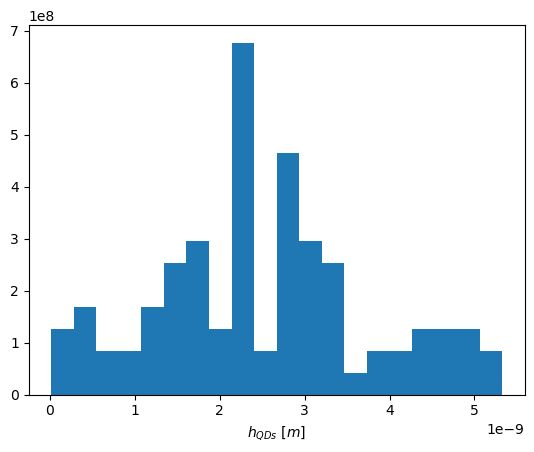

In [ ]:
z, r = np.loadtxt("dati.txt", skiprows=1, usecols=(0, 1), unpack=True)
z -= 3.7*10**-9

z = z[z < 1e-8] #c'è un outlier molto lontnìano da tutti, qui lo tolgo brutalmente così

plt.hist(z, bins=20, density=True)
plt.xlabel('$h_{QDs} \ [m]$')
plt.show()

In [206]:
xgrid = np.linspace(min(z), max(z), 100)

bandwidth = 0.4e-9
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(z[:, np.newaxis])

log_pdf = kde.score_samples(xgrid[:, np.newaxis])

We have a peak around $h_{QDs} \simeq 5 \ nm$, which is the height used in the simulations for explaining the experimental results!!!

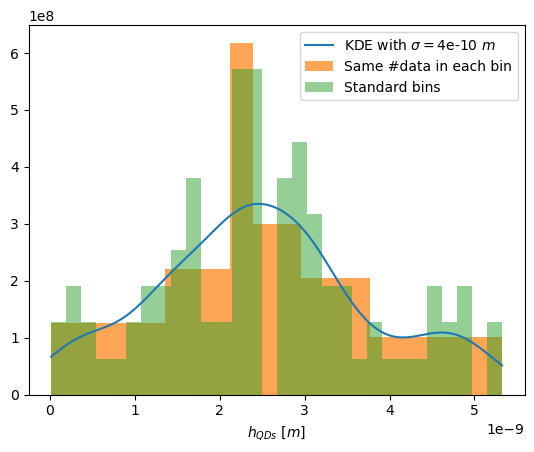

In [207]:
bins = np.append(np.sort(z)[::15], np.max(z)) 

plt.plot(xgrid, np.exp(log_pdf), label=f'KDE with $\sigma = ${bandwidth} $m$')
plt.hist(z, bins=bins, density=True, alpha=0.7, label='Same #data in each bin')
plt.hist(z, bins=30, density=True, alpha=0.5, label='Standard bins')
plt.legend()
plt.xlabel('$h_{QDs} \ [m]$')
plt.show()